In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob


In [14]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCACapacity.csv")
MCACapacity

,technology,dst_region,region,agent,sector,type,year,capacity
0,Biomass Power Plant,Kenya,Kenya,A1,power,retrofit,2020,2.7864
1,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2020,12.9722
2,Large Hydropower Plant (Dam) (>100MW),Kenya,Kenya,A1,power,retrofit,2020,15.4490
3,Light Fuel Oil Power Plant,Kenya,Kenya,A1,power,retrofit,2020,8.9010
4,Medium Hydropower Plant (10-100MW),Kenya,Kenya,A1,power,retrofit,2020,7.7028
...,...,...,...,...,...,...,...,...
78,Medium Hydropower Plant (10-100MW),Kenya,Kenya,A1,power,retrofit,2050,4.0936
79,Oil Fired Gas Turbine (SCGT),Kenya,Kenya,A1,power,retrofit,2050,7.3547
80,Onshore Wind,Kenya,Kenya,A1,power,retrofit,2050,5.1006
81,Solar PV (Distributed with Storage),Kenya,Kenya,A1,power,retrofit,2050,0.6226


In [15]:
MCACapacity_summed = MCACapacity.groupby(["technology", "sector", "year"]).sum().reset_index()
MCACapacity_summed

,technology,sector,year,capacity
0,Biomass Power Plant,power,2020,2.7864
1,Biomass Power Plant,power,2025,2.5078
2,Biomass Power Plant,power,2030,2.2570
3,Biomass Power Plant,power,2035,2.0313
4,Biomass Power Plant,power,2040,1.8282
...,...,...,...,...
64,Solar PV (Utility),power,2030,0.6019
65,Solar PV (Utility),power,2035,0.5417
66,Solar PV (Utility),power,2040,0.4875
67,Solar PV (Utility),power,2045,0.4388


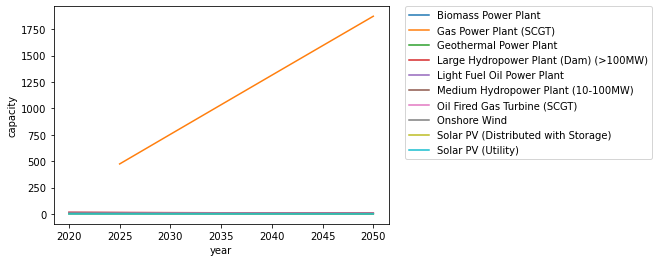

In [16]:
sns.lineplot(data=MCACapacity_summed[(MCACapacity_summed.sector=="power")], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


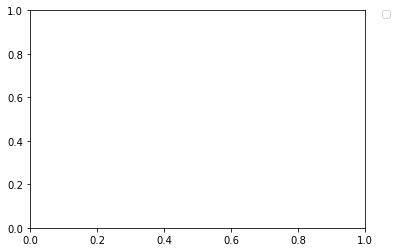

In [17]:
sns.lineplot(data=MCACapacity_summed[MCACapacity_summed.sector=="oil"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
prices = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCAPrices.csv")
prices

,timeslice,commodity,region,prices,year
0,"('all-year', 'all-week', 'night')",crude_oil,Kenya,12.200,2020
1,"('all-year', 'all-week', 'night')",biomass,Kenya,1.760,2020
2,"('all-year', 'all-week', 'night')",coal,Kenya,5.100,2020
3,"('all-year', 'all-week', 'night')",lfo,Kenya,14.750,2020
4,"('all-year', 'all-week', 'night')",hfo,Kenya,8.870,2020
...,...,...,...,...,...
331,"('all-year', 'all-week', 'evening')",lfo,Kenya,23.610,2050
332,"('all-year', 'all-week', 'evening')",hfo,Kenya,14.200,2050
333,"('all-year', 'all-week', 'evening')",gas,Kenya,11.000,2050
334,"('all-year', 'all-week', 'evening')",uranium,Kenya,1.764,2050


In [19]:
prices_summed = prices.groupby(["commodity","year"]).mean("prices").reset_index()
prices_summed

,commodity,year,prices
0,biomass,2020,1.7600
1,biomass,2025,1.7600
2,biomass,2030,1.7600
3,biomass,2035,1.7600
4,biomass,2040,1.7600
5,biomass,2045,1.7600
6,biomass,2050,1.7600
7,coal,2020,5.1000
8,coal,2025,5.3000
9,coal,2030,5.5000


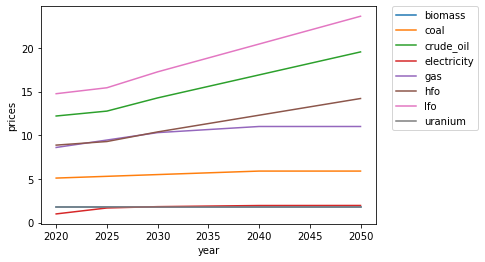

In [20]:
sns.lineplot(data=prices_summed, x="year", y="prices", hue="commodity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Supply

In [21]:
path = "/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/Power/Supply/"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['file'] = filename.split("/")[-1].split(".")[0]
    li.append(df)

supply = pd.concat(li, axis=0, ignore_index=True)
supply


,Unnamed: 0,commodity,region,technology,year,supply,file
0,0,CO2f,Kenya,Biomass Power Plant,2040,91.4079,2040
1,1,CO2f,Kenya,Coal Power Plant,2040,0.0001,2040
2,2,CO2f,Kenya,Coal Power Plant,2040,0.0001,2040
3,3,CO2f,Kenya,Gas Power Plant (CCGT),2040,0.0001,2040
4,4,CO2f,Kenya,Gas Power Plant (CCGT),2040,0.0001,2040
...,...,...,...,...,...,...,...
291,31,electricity,Kenya,Medium Hydropower Plant (10-100MW),2035,2.6954,2030
292,32,electricity,Kenya,Oil Fired Gas Turbine (SCGT),2035,8.0710,2030
293,33,electricity,Kenya,Onshore Wind,2035,1.4693,2030
294,34,electricity,Kenya,Solar PV (Distributed with Storage),2035,0.2733,2030


In [22]:
electricity_supply = supply[supply.commodity=="electricity"]
electricity_supply

,Unnamed: 0,commodity,region,technology,year,supply,file
25,25,electricity,Kenya,Biomass Power Plant,2040,0.9141,2040
26,26,electricity,Kenya,Gas Power Plant (SCGT),2040,402.6230,2040
27,27,electricity,Kenya,Gas Power Plant (SCGT),2040,238.5217,2040
28,28,electricity,Kenya,Gas Power Plant (SCGT),2040,238.1295,2040
29,29,electricity,Kenya,Gas Power Plant (SCGT),2040,237.7766,2040
...,...,...,...,...,...,...,...
291,31,electricity,Kenya,Medium Hydropower Plant (10-100MW),2035,2.6954,2030
292,32,electricity,Kenya,Oil Fired Gas Turbine (SCGT),2035,8.0710,2030
293,33,electricity,Kenya,Onshore Wind,2035,1.4693,2030
294,34,electricity,Kenya,Solar PV (Distributed with Storage),2035,0.2733,2030


In [23]:
elec_summed = electricity_supply.groupby(["commodity", "region", "technology", "year"]).sum().reset_index()
elec_summed 

,commodity,region,technology,year,Unnamed: 0,supply
0,electricity,Kenya,Biomass Power Plant,2020,7,1.3932
1,electricity,Kenya,Biomass Power Plant,2025,25,2.5078
2,electricity,Kenya,Biomass Power Plant,2030,32,2.2570
3,electricity,Kenya,Biomass Power Plant,2035,43,2.0312
4,electricity,Kenya,Biomass Power Plant,2040,56,1.8282
...,...,...,...,...,...,...
65,electricity,Kenya,Solar PV (Utility),2030,52,0.3852
66,electricity,Kenya,Solar PV (Utility),2035,65,0.3466
67,electricity,Kenya,Solar PV (Utility),2040,80,0.3120
68,electricity,Kenya,Solar PV (Utility),2045,94,0.2808


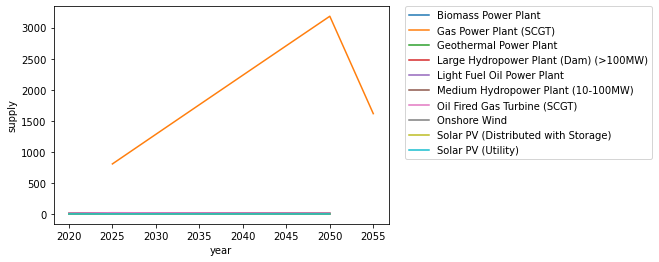

In [24]:
sns.lineplot(data=elec_summed, x="year", y="supply", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)